In [109]:
#reading the data inside the dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('Downloads/credit card dataset.csv')

# Print column names
print(data.columns)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [110]:
data.head(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   
5   6      50000    1          1         2   37      0      0      0      0   
6   7     500000    1          1         2   29      0      0      0      0   
7   8     100000    2          2         2   23      0     -1     -1      0   
8   9     140000    2          3         1   28      0      0      2      0   
9  10      20000    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   
5  ...      19394      19619      20024      2500      1815       657   
6  ...     542653     483003     473944     55000     40000     38000   
7  ...        221       -159        567       380       601         0   
8  ...      12211      11793       3719      3329         0       432   
9  ...          0      13007      13912         0         0         0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  
5      1000      1000       800                           0  
6     20239     13750     13770                           0  
7       581      1687      1542                           0  
8      1000      1000      1000                           0  
9     13007      1122         0                           0  

[10 rows x 25 columns]

In [111]:
print(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].head())

#changing to numeric if there is any non-numeric values
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(subset=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace=True)

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0       3913       3102        689          0          0          0
1       2682       1725       2682       3272       3455       3261
2      29239      14027      13559      14331      14948      15549
3      46990      48233      49291      28314      28959      29547
4       8617       5670      35835      20940      19146      19131


In [112]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Downloads/credit card dataset.csv')

# Inspect the data
print(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].head())

# Convert columns to numeric
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
data.dropna(subset=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace=True)

# Feature engineering
def feature_engineering(df):
    # Create new features from raw data
    df['CUR'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) / df['LIMIT_BAL']
    df['PDT'] = (df['PAY_0'] * 3 + df['PAY_2'] * 2.5 + df['PAY_3'] * 2 + df['PAY_4'] * 1.5 + df['PAY_5'] * 1 + df['PAY_6'] * 0.5)
    df['TOA'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
    df['RPB'] = (df['PAY_0'] + df['PAY_2']) / 2
    df['Defaults'] = df['default payment next month']
    return df

# Apply feature engineering
data = feature_engineering(data)

# Select only the new features
engineered_features = data[['CUR', 'PDT', 'TOA', 'RPB', 'Defaults']]

# Save the engineered features to a new CSV file
engineered_features.to_csv("Desktop/dataset/engineered_features_only.csv", index=False)

print("Engineered features saved successfully!")


   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0       3913       3102        689          0          0          0
1       2682       1725       2682       3272       3455       3261
2      29239      14027      13559      14331      14948      15549
3      46990      48233      49291      28314      28959      29547
4       8617       5670      35835      20940      19146      19131
Engineered features saved successfully!


In [113]:
import pandas as pd
# Load the engineered features
df = pd.read_csv("Desktop/dataset/engineered_features_only.csv")

# Generate summary statistics for all columns (including Defaults)
summary = df[['CUR', 'PDT', 'TOA', 'RPB', 'Defaults']].describe()
# Display the summary
print(summary)



                CUR           PDT           TOA           RPB      Defaults
count  30000.000000  30000.000000  3.000000e+04  30000.000000  30000.000000
mean       0.373048     -1.459667  2.698617e+05     -0.075233      0.221200
std        0.351890     10.372223  3.795643e+05      1.061231      0.415062
min       -0.232590    -21.000000 -3.362590e+05     -2.000000      0.000000
25%        0.029997     -8.500000  2.868800e+04     -0.500000      0.000000
50%        0.284834      0.000000  1.263110e+05      0.000000      0.000000
75%        0.687929      0.000000  3.426265e+05      0.000000      0.000000
max        5.364308     66.500000  5.263883e+06      7.500000      1.000000


In [114]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df)  # df is your original DataFrame

# Convert back to DataFrame with original column names
data_scaled = pd.DataFrame(data, columns=df.columns)

# Print the first 10 rows of the scaled data
print(data_scaled.head(10))


        CUR       PDT       TOA       RPB  Defaults
0 -0.877698  0.574589 -0.690692  1.955529  1.876378
1 -0.992741  0.429970 -0.665997  0.542053  1.876378
2 -0.525178  0.140731 -0.443170  0.070894 -0.532942
3  1.131240  0.140731 -0.101507  0.070894 -0.532942
4 -0.024396 -0.341334 -0.422920 -0.400265 -0.532942
5  1.195466  0.140731 -0.083644  0.070894 -0.532942
6  1.520814  0.140731  6.467347  0.070894 -0.532942
7 -0.996269 -0.341334 -0.675458 -0.400265 -0.532942
8 -0.839523  0.526383 -0.539179  0.070894 -0.532942
9 -0.422648 -1.739322 -0.640067 -1.813742 -0.532942


In [115]:
data.shape

(30000, 5)

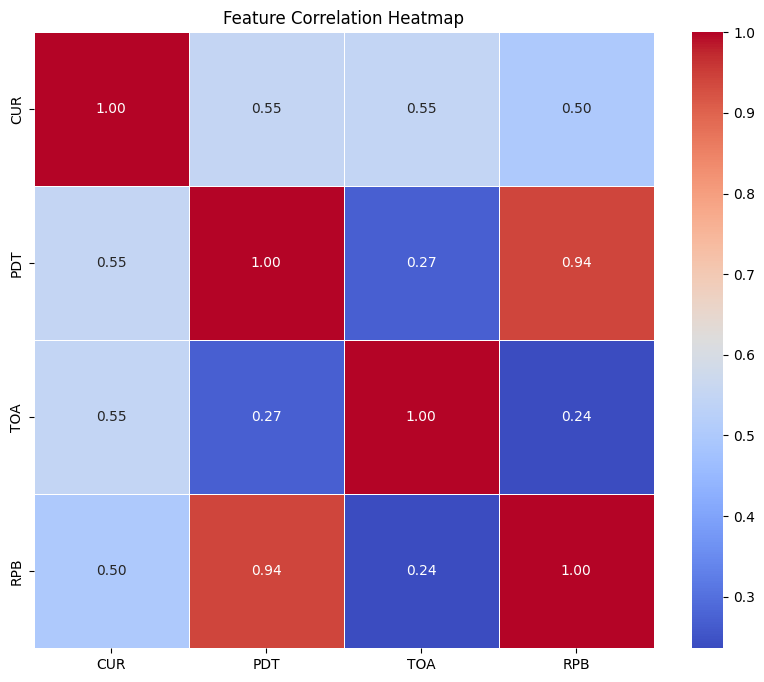

In [146]:
#HEATMAP - to show how the features are correlated 
# 1.0: Perfect positive correlation (red color in your heatmap).
# 0.0: No correlation (neutral, light blue).
# -1.0: Perfect negative correlation (not present here).
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'data' is a DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data, columns=['CUR', 'PDT', 'TOA', 'RPB', 'Cluster'])  # Adjust column names if needed

# Select numerical features for the heatmap (exclude 'Cluster' or other categorical columns)
numerical_features = ['CUR', 'PDT', 'TOA', 'RPB']

# Compute the correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [116]:
import numpy as np

if np.any(np.isnan(data)) or np.any(np.isinf(data)):
    print("Warning: NaN or Inf values found in the dataset.")
    data = np.nan_to_num(data)  # Replace NaNs and Infs with 0

In [118]:
# Split data into 100 chunks
chunks = np.array_split(data_scaled, 100)  # Each chunk contains 300 rows (approx.)


In [119]:
from sklearn.cluster import MiniBatchKMeans

n_micro_clusters = 100     # Number of micro-clusters per chunk
decay_factor = 0.9         # Decay factor for micro-cluster weights
micro_clusters = []        # List to store micro-cluster information


In [120]:
for i, chunk in enumerate(chunks):
    # Apply MiniBatchKMeans to the current chunk
    mbk = MiniBatchKMeans(n_clusters=n_micro_clusters, random_state=42)
    mbk.fit(chunk)
    
    # Get cluster centers from MiniBatchKMeans
    centers = mbk.cluster_centers_
    
    # Apply decay to previous micro-cluster weights
    if i > 0:
        micro_clusters[:, -1] *= decay_factor  # Decay the weights (last column)
    
    # Add new clusters with an initial weight of 1
    if i == 0:
        micro_clusters = np.hstack((centers, np.ones((n_micro_clusters, 1))))  # Add weights of 1
    else:
        new_clusters = np.hstack((centers, np.ones((n_micro_clusters, 1))))
        micro_clusters = np.vstack((micro_clusters, new_clusters))


In [121]:
from sklearn.cluster import DBSCAN

# Use DBSCAN to merge micro-clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(micro_clusters[:, :-1])  # Ignore weights during clustering


In [122]:
print(f"Shape of micro_clusters: {np.array(micro_clusters).shape}")

merged_clusters = pd.DataFrame(micro_clusters, columns=['CUR', 'PDT', 'TOA', 'RPB', 'Default', 'cluster_label'])


Shape of micro_clusters: (10000, 6)


In [123]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
final_labels = dbscan.fit_predict(micro_clusters[:, :-1])  # Ignore weight column
merged_clusters['final_cluster_label'] = final_labels


In [124]:
#handling outliners
outliers = merged_clusters[merged_clusters['final_cluster_label'] == -1]
core_clusters = merged_clusters[merged_clusters['final_cluster_label'] != -1]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 376


In [125]:
# Cluster analysis
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        print("Noise")
    else:
        print(f"Cluster {label}: {np.sum(labels == label)} points")

Cluster 0: 6570 points
Cluster 1: 3003 points
Cluster 2: 7 points
Cluster 3: 7 points
Cluster 4: 5 points
Cluster 5: 5 points
Cluster 6: 5 points
Cluster 7: 7 points
Cluster 8: 5 points
Cluster 9: 5 points
Cluster 10: 5 points
Noise


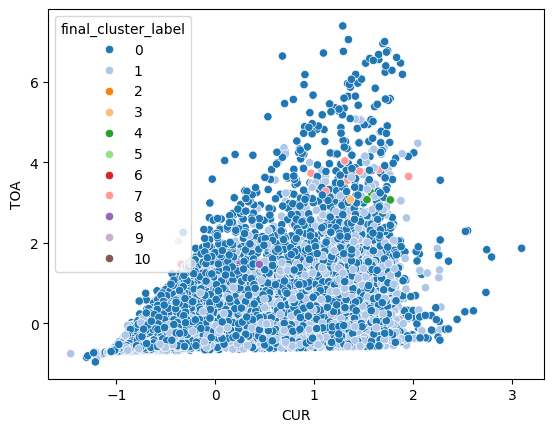

In [126]:
#visualizing the clustering result
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='CUR', y='TOA', hue='final_cluster_label', data=core_clusters, palette='tab20')
plt.show()


In [127]:
core_clusters.loc[:, 'Default'] = core_clusters['Default'].abs()


In [130]:
import plotly.express as px
import pandas as pd

# Ensure the size column contains only non-negative values
core_clusters['Default'] = core_clusters['Default'].abs()  # Option 1: Take absolute value

fig = px.scatter_3d(
    core_clusters,
    x='CUR', 
    y='TOA', 
    z='RPB',
    color='PDT',  
    size='Default',  # Bubble size
    title='4D Visualization of Clusters',
    labels={'CUR': 'CUR', 'TOA': 'TOA', 'RPB': 'RPB', 'PDT': 'PDT'}
)

fig.update_layout(scene=dict(
    xaxis_title='CUR',
    yaxis_title='TOA',
    zaxis_title='RPB'
))

fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17044\3085802255.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



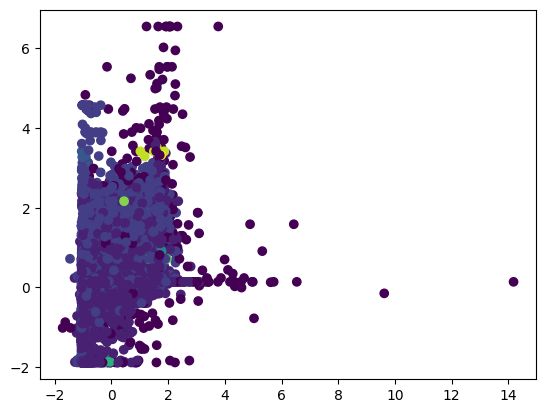

In [131]:
# Visualization
import matplotlib.pyplot as plt

plt.scatter(np.vstack(micro_clusters)[:, 0], np.vstack(micro_clusters)[:, 1], c=labels, cmap='viridis')
plt.show()

In [132]:
import numpy as np

unique_labels = np.unique(labels)
print(f"Unique Clusters: {unique_labels}")
print(f"Number of Clusters: {len(unique_labels)}")


Unique Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10]
Number of Clusters: 12


In [133]:
#guard against cluster error
from sklearn.metrics import silhouette_score

if len(unique_labels) > 1:
    score = silhouette_score(np.vstack(micro_clusters), labels)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette Score cannot be computed: Only one cluster found.")

Silhouette Score: -0.01730218753537834


In [134]:
#finding the cluster input data
from sklearn.cluster import KMeans

X = data_scaled  # <-- What data did you cluster?
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

In [135]:
#verify data shapes
print(f"Original Data Shape: {data.shape}")
print(f"Clustering Input Shape: {X.shape}")
print(f"Labels Length: {len(labels)}")


Original Data Shape: (30000, 5)
Clustering Input Shape: (30000, 5)
Labels Length: 30000


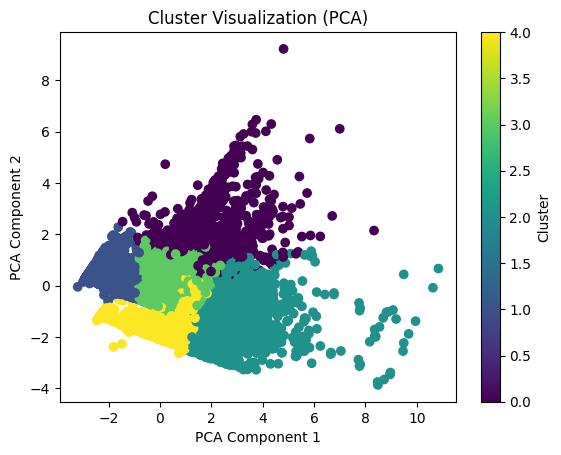

In [136]:
#visualizing the clusters in a histrograms type 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [137]:
print(data.shape)


(30000, 5)


Size of adjusted_labels: 10000
Size of all_data_pca: 10000


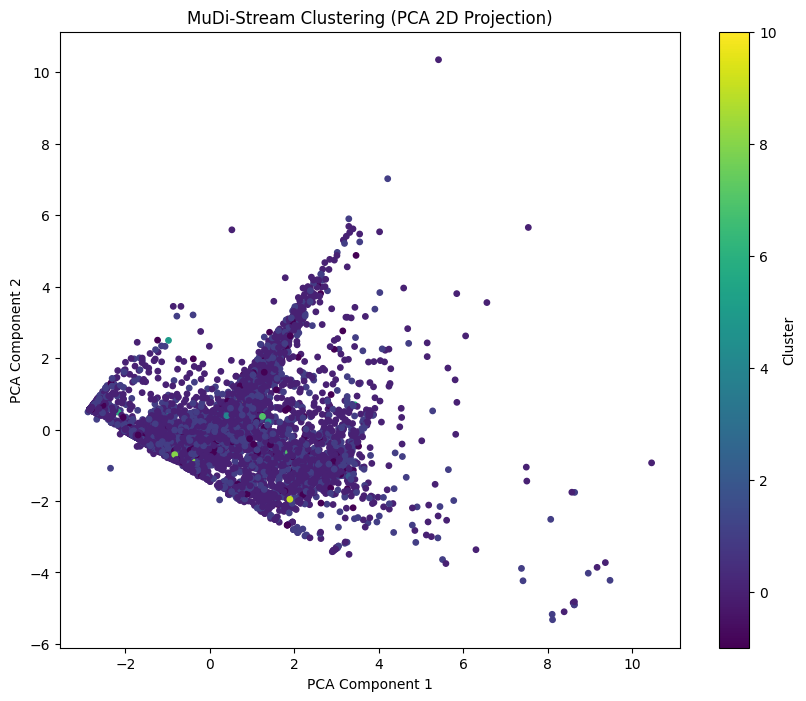

In [138]:
#fixing the labels sizes
# Ensure 'all_data_pca' and 'final_labels' have matching sizes
if len(final_labels) != len(all_data_pca):
    # Repeat the labels to match the size of 'all_data_pca'
    repeat_factor = len(all_data_pca) // len(final_labels)
    adjusted_labels = np.tile(final_labels, repeat_factor)
else:
    adjusted_labels = final_labels

# Check the new size
print(f"Size of adjusted_labels: {len(adjusted_labels)}")
print(f"Size of all_data_pca: {len(all_data_pca)}")

# Visualization with adjusted labels
plt.figure(figsize=(10, 8))
plt.scatter(all_data_pca[:, 0], all_data_pca[:, 1], c=adjusted_labels, cmap='viridis', s=15, label='Data Points')
plt.title("MuDi-Stream Clustering (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


Selected features: ['CUR', 'PDT', 'TOA', 'RPB']


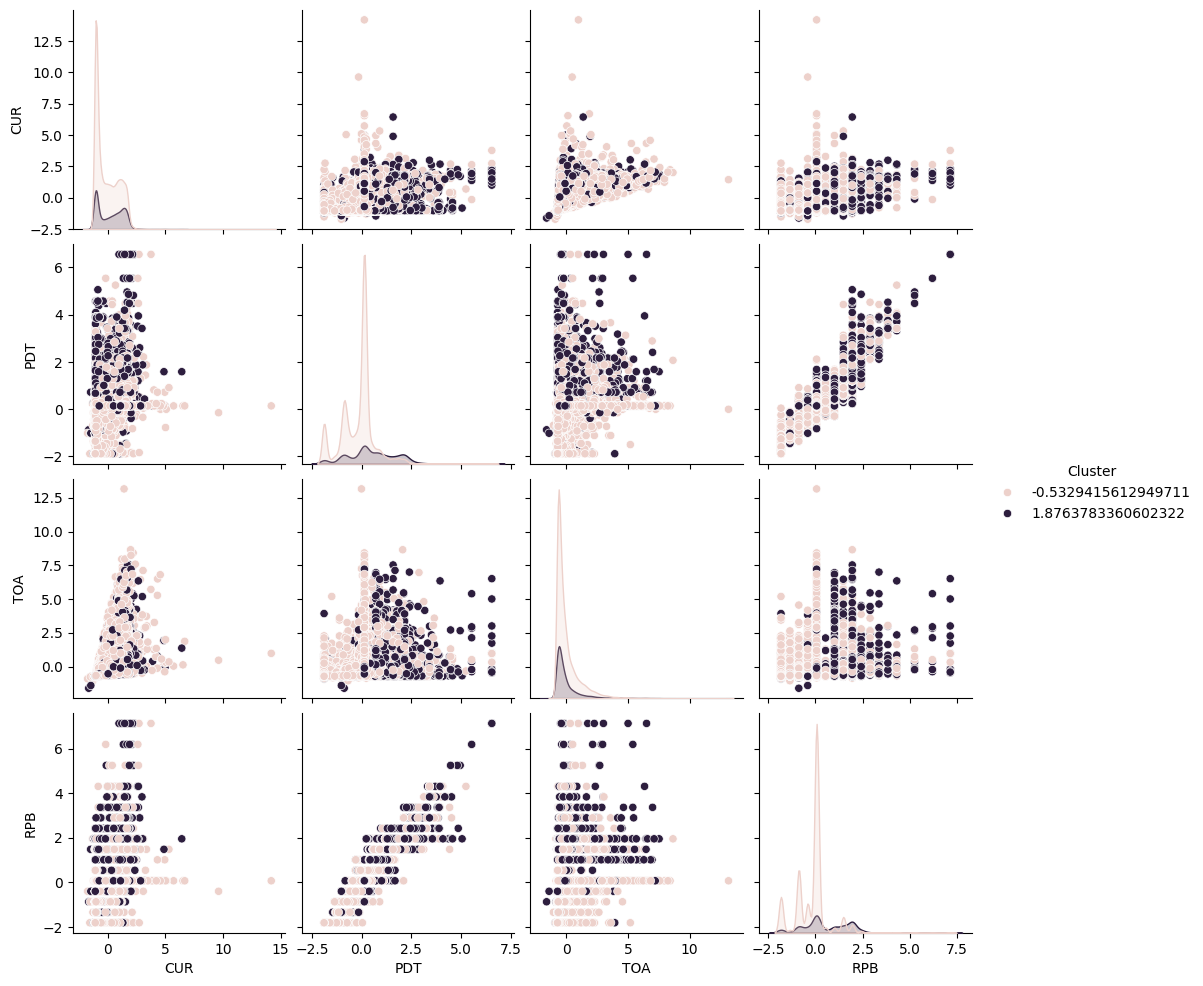

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'data' is a DataFrame
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data, columns=['CUR', 'PDT', 'TOA', 'RPB', 'Cluster'])  # Adjusted to match the 5 columns

# Check for missing columns and adjust selected_features
available_features = [col for col in ['CUR', 'PDT', 'TOA', 'RPB'] if col in data.columns]
print("Selected features:", available_features)

# Pair plot for available features
if len(available_features) > 1:
    sns.pairplot(data, hue='Cluster', vars=available_features)
    plt.show()
else:
    print("Not enough features for pair plot.")


In [102]:
#Evaluating the silhouette score and cluster stablity
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

# Check for consistent length
if len(all_data) != len(final_labels):
    print(f"Inconsistent sizes: all_data = {len(all_data)}, final_labels = {len(final_labels)}")
    
    # Adjust all_data to match the size of final_labels
    subset_data = all_data[:len(final_labels)]
    print(f"Adjusted all_data size to: {len(subset_data)}")
else:
    subset_data = all_data

# Compute Silhouette Score (only for cluster sizes > 1)
if len(np.unique(final_labels)) > 1:
    silhouette_avg = silhouette_score(subset_data, final_labels)
    print(f"Silhouette Score: {silhouette_avg:.2f}")
else:
    print("Silhouette Score: Not applicable (only one cluster detected)")

# Cluster Stability: Adjusted Rand Index (if previous_labels exists)
if 'previous_labels' in locals() and len(previous_labels) == len(final_labels):
    ari_score = adjusted_rand_score(previous_labels, final_labels)
    print(f"Adjusted Rand Index (Cluster Stability): {ari_score:.2f}")
else:
    print("Adjusted Rand Index: Not computed (no previous_labels or size mismatch)")



Inconsistent sizes: all_data = 30000, final_labels = 10000
Adjusted all_data size to: 10000
Silhouette Score: -0.33
Adjusted Rand Index: Not computed (no previous_labels or size mismatch)


In [108]:
#Simulates real-time clustering of incoming data streams.
from sklearn.cluster import DBSCAN
import numpy as np
import time

batch_size = 1000
total_batches = len(data) // batch_size

for i in range(total_batches):
    batch_data = data[i * batch_size:(i + 1) * batch_size]
    
    # Simulate clustering for the batch with DBSCAN
    clustering = DBSCAN(eps=0.5, min_samples=10).fit(batch_data)
    labels = clustering.labels_

    print(f"Batch {i + 1}/{total_batches} processed with {len(set(labels)) - (1 if -1 in labels else 0)} clusters.")

    time.sleep(0.5)


Batch 1/30 processed with 4 clusters.
Batch 2/30 processed with 5 clusters.
Batch 3/30 processed with 5 clusters.
Batch 4/30 processed with 4 clusters.
Batch 5/30 processed with 4 clusters.
Batch 6/30 processed with 3 clusters.
Batch 7/30 processed with 3 clusters.
Batch 8/30 processed with 5 clusters.
Batch 9/30 processed with 4 clusters.
Batch 10/30 processed with 5 clusters.
Batch 11/30 processed with 2 clusters.
Batch 12/30 processed with 5 clusters.
Batch 13/30 processed with 5 clusters.
Batch 14/30 processed with 7 clusters.
Batch 15/30 processed with 5 clusters.
Batch 16/30 processed with 7 clusters.
Batch 17/30 processed with 8 clusters.
Batch 18/30 processed with 6 clusters.
Batch 19/30 processed with 5 clusters.
Batch 20/30 processed with 5 clusters.
Batch 21/30 processed with 6 clusters.
Batch 22/30 processed with 4 clusters.
Batch 23/30 processed with 5 clusters.
Batch 24/30 processed with 4 clusters.
Batch 25/30 processed with 4 clusters.
Batch 26/30 processed with 5 clust

In [155]:
#outliners detected and ploted in graph, scatterplot and also in 4d

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Separate outliers and non-outliers
outlier_data = data[outliers]
non_outlier_data = data[~outliers]

# Summary
print(f"Total data points: {len(data)}")
print(f"Outliers detected: {len(outlier_data)}")


Total data points: 30000
Outliers detected: 12856


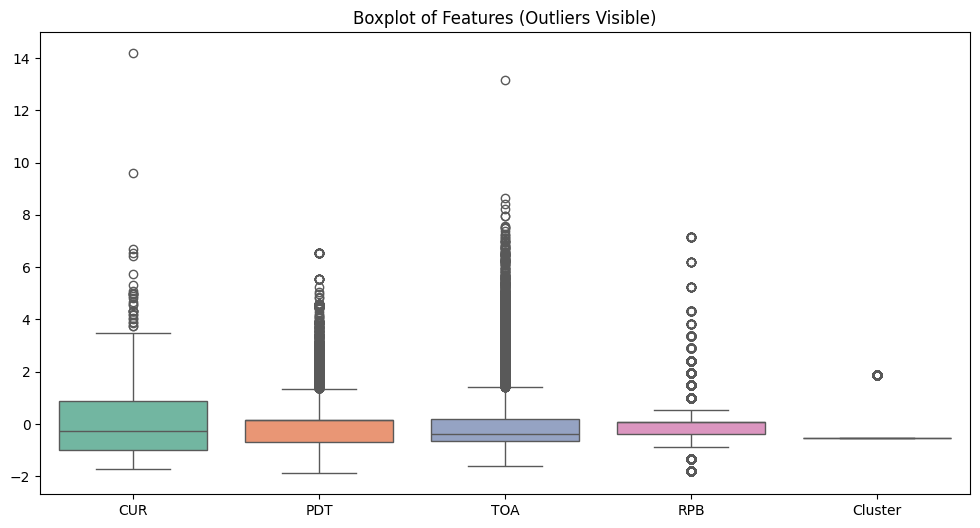

In [151]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, palette='Set2')
plt.title("Boxplot of Features (Outliers Visible)")
plt.show()


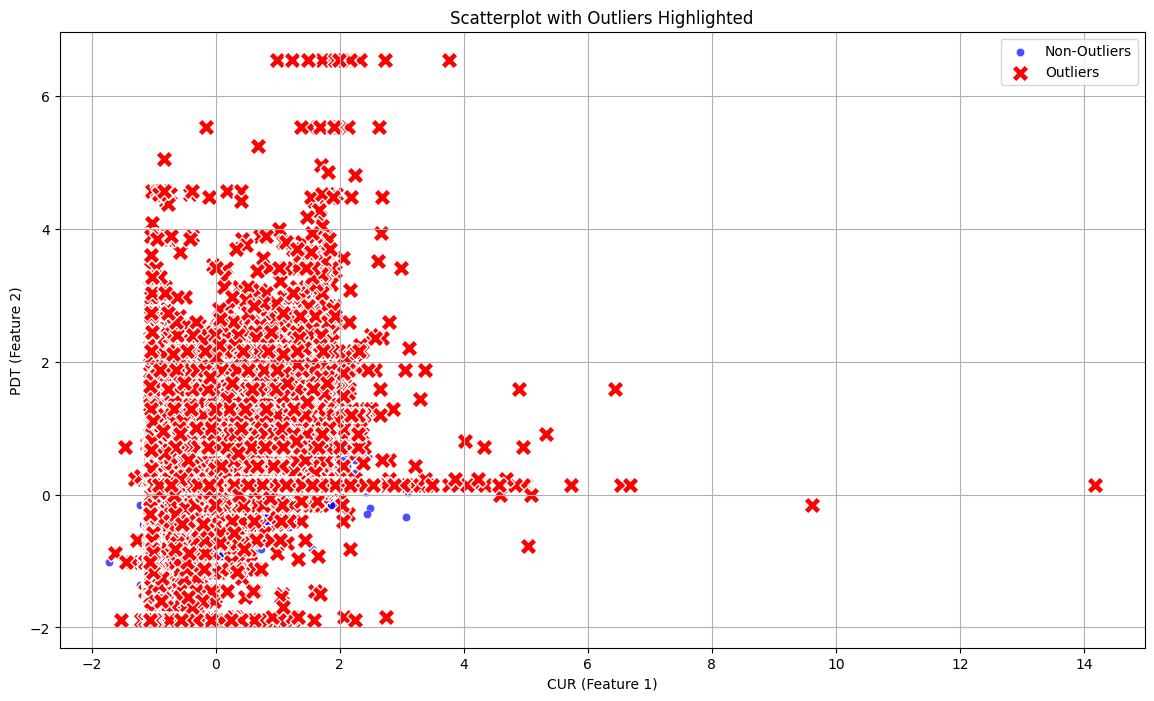

In [152]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=non_outlier_data, x='CUR', y='PDT', label='Non-Outliers', alpha=0.7, color='blue')
sns.scatterplot(data=outlier_data, x='CUR', y='PDT', label='Outliers', color='red', marker='X', s=150)

plt.title("Scatterplot with Outliers Highlighted")
plt.xlabel("CUR (Feature 1)")
plt.ylabel("PDT (Feature 2)")
plt.legend()
plt.grid(True)
plt.show()


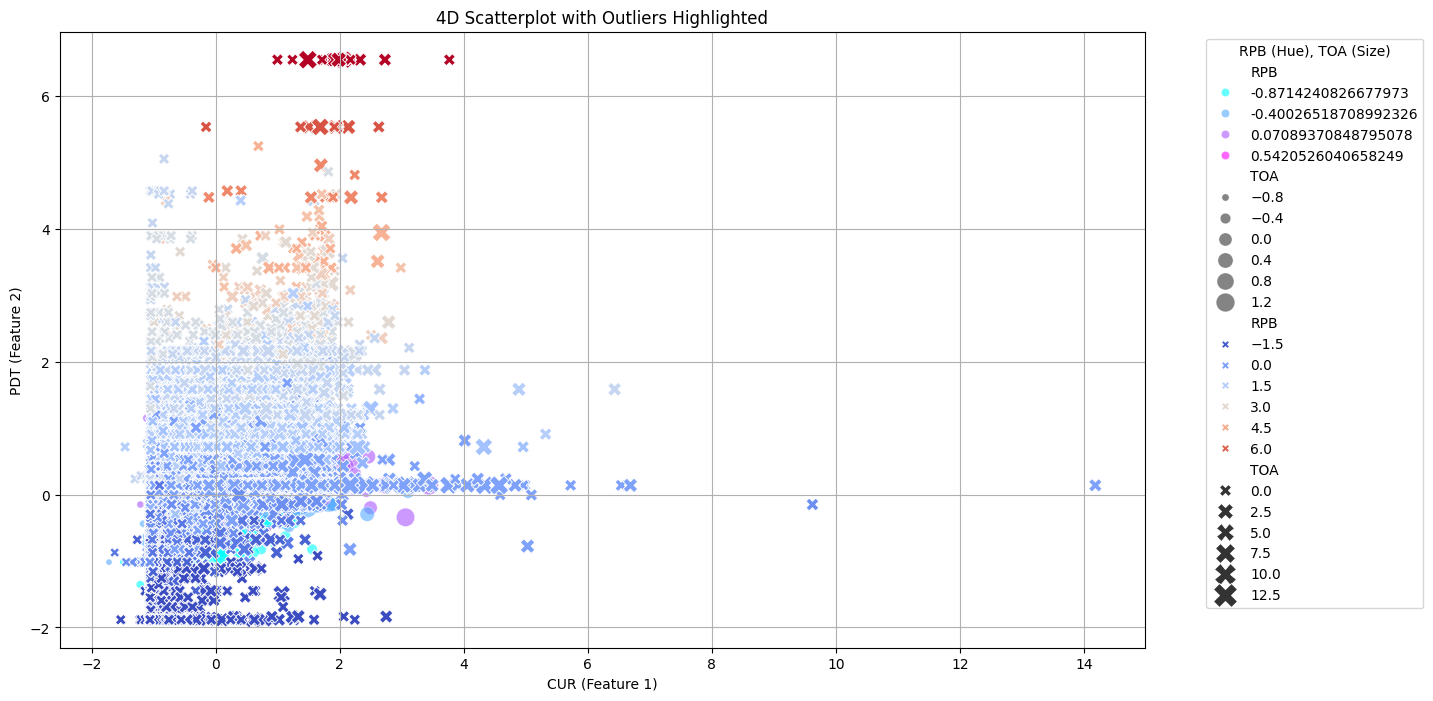

In [154]:
plt.figure(figsize=(14, 8))

# Plot non-outliers
sns.scatterplot(
    data=non_outlier_data, 
    x='CUR', y='PDT', 
    size='TOA', hue='RPB', 
    sizes=(20, 200), palette='cool', 
    alpha=0.6
)

# Plot outliers
sns.scatterplot(
    data=outlier_data, 
    x='CUR', y='PDT', 
    size='TOA', hue='RPB', 
    sizes=(50, 300), palette='coolwarm', 
    marker='X'
)

plt.title("4D Scatterplot with Outliers Highlighted")
plt.xlabel("CUR (Feature 1)")
plt.ylabel("PDT (Feature 2)")
plt.grid(True)
plt.legend(title="RPB (Hue), TOA (Size)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
